In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('20200124_ews_observations.csv',sep=',',low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        171736 non-null  int64  
 1   ObservationDate  171736 non-null  object 
 2   EwsProcedure     171736 non-null  object 
 3   EWS_Total        171736 non-null  int64  
 4   SBP              160949 non-null  float64
 5   SBP_Score        160949 non-null  float64
 6   LOC              171736 non-null  object 
 7   LOC_Score        171736 non-null  int64  
 8   SpO2             171734 non-null  float64
 9   SpO2_Score       171734 non-null  float64
 10  Add_O2           171734 non-null  object 
 11  Add_O2_Score     171734 non-null  float64
 12  HR               171736 non-null  int64  
 13  HR_Score         171736 non-null  int64  
 14  RR               171736 non-null  int64  
 15  RR_Score         171736 non-null  int64  
 16  TEMP             171736 non-null  floa

In [4]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Days'] = df['ObservationDate'].dt.day
df['Month'] = df['ObservationDate'].dt.month
df['Year'] = df['ObservationDate'].dt.year
df['Hour'] = df['ObservationDate'].dt.hour
df['Minute'] = df['ObservationDate'].dt.minute

In [5]:
df.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,...,HR_Score,RR,RR_Score,TEMP,TEMP_Score,Days,Month,Year,Hour,Minute
0,29,2019-05-01 13:27:50,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,...,0,18,0,36.6,0,1,5,2019,13,27
1,30,2019-05-01 15:27:44,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,...,0,16,0,36.5,0,1,5,2019,15,27
2,31,2019-05-01 15:54:27,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,...,0,14,0,37.3,0,1,5,2019,15,54
3,32,2019-05-01 16:07:27,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,...,0,19,0,37.2,0,1,5,2019,16,7
4,33,2019-05-01 17:03:16,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,...,0,14,0,36.1,0,1,5,2019,17,3


In [6]:
#df = df.drop('PatientId',axis=1)

In [7]:
df.mean()

<ipython-input-7-c61f0c8f89b5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


PatientId       5174.344669
EWS_Total          1.929537
SBP              120.688665
SBP_Score          0.499096
LOC_Score          0.011477
SpO2              95.947407
SpO2_Score         0.355928
Add_O2             0.208212
Add_O2_Score       0.416423
HR                79.758921
HR_Score           0.320253
RR                17.263102
RR_Score           0.245167
TEMP              36.642783
TEMP_Score         0.083628
Days              15.996920
Month              8.803943
Year            2019.004705
Hour              11.896050
Minute            28.858341
dtype: float64

In [8]:
df.std()

PatientId       3613.339400
EWS_Total          1.890388
SBP               19.599943
SBP_Score          0.813013
LOC_Score          0.185201
SpO2               3.777995
SpO2_Score         0.690071
Add_O2             0.406030
Add_O2_Score       0.812060
HR                17.467517
HR_Score           0.600285
RR                 3.364965
RR_Score           0.693101
TEMP               0.525958
TEMP_Score         0.284159
Days               8.736386
Month              2.230102
Year               0.068431
Hour               6.270579
Minute            17.445747
dtype: float64

In [9]:
df.max()

PatientId                        20532
ObservationDate    2020-01-02 09:03:56
EwsProcedure                     NEWS2
EWS_Total                           19
SBP                                234
SBP_Score                            3
LOC                              VOICE
LOC_Score                            3
SpO2                               100
SpO2_Score                           3
Add_O2                            True
Add_O2_Score                         2
HR                                 252
HR_Score                             3
RR                                 116
RR_Score                             3
TEMP                                50
TEMP_Score                           3
Days                                31
Month                               12
Year                              2020
Hour                                23
Minute                              59
dtype: object

In [10]:
df.min()

PatientId                           29
ObservationDate    2019-05-01 13:27:50
EwsProcedure                     NEWS2
EWS_Total                            0
SBP                                  0
SBP_Score                            0
LOC                              ALERT
LOC_Score                            0
SpO2                                 0
SpO2_Score                           0
Add_O2                           False
Add_O2_Score                         0
HR                                  20
HR_Score                             0
RR                                   0
RR_Score                             0
TEMP                                 3
TEMP_Score                           0
Days                                 1
Month                                1
Year                              2019
Hour                                 0
Minute                               0
dtype: object

In [11]:
df.quantile(0.25)

PatientId       2263.0
EWS_Total          0.0
SBP              107.0
SBP_Score          0.0
LOC_Score          0.0
SpO2              95.0
SpO2_Score         0.0
Add_O2_Score       0.0
HR                67.0
HR_Score           0.0
RR                16.0
RR_Score           0.0
TEMP              36.3
TEMP_Score         0.0
Days               9.0
Month              7.0
Year            2019.0
Hour               6.0
Minute            14.0
Name: 0.25, dtype: float64

In [12]:
df.quantile(0.25)*1.5

PatientId       3394.50
EWS_Total          0.00
SBP              160.50
SBP_Score          0.00
LOC_Score          0.00
SpO2             142.50
SpO2_Score         0.00
Add_O2_Score       0.00
HR               100.50
HR_Score           0.00
RR                24.00
RR_Score           0.00
TEMP              54.45
TEMP_Score         0.00
Days              13.50
Month             10.50
Year            3028.50
Hour               9.00
Minute            21.00
Name: 0.25, dtype: float64

<AxesSubplot:>

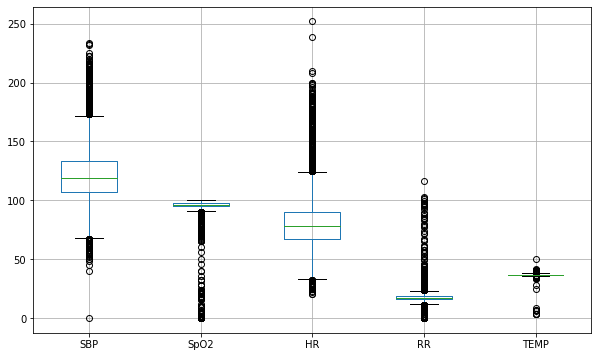

In [13]:
#df.boxplot(figsize=(10,6))
#df.plot.box(vert=False)
df.boxplot(column=['SBP','SpO2','HR','RR','TEMP'],figsize=(10,6))

In [14]:
df.skew()

PatientId        1.364420
EWS_Total        1.160498
SBP              0.563004
SBP_Score        1.529286
LOC_Score       16.074905
SpO2           -12.013741
SpO2_Score       2.056386
Add_O2           1.437292
Add_O2_Score     1.437292
HR               0.787031
HR_Score         2.021606
RR               2.876129
RR_Score         2.721991
TEMP            -9.704415
TEMP_Score       3.400336
Days            -0.023148
Month           -0.278705
Year            14.475944
Hour            -0.109371
Minute           0.058294
dtype: float64

In [15]:
df.kurtosis()

PatientId         3.963784
EWS_Total         1.421509
SBP               0.565477
SBP_Score         1.367186
LOC_Score       256.405556
SpO2            272.120672
SpO2_Score        3.789815
Add_O2            0.065808
Add_O2_Score      0.065808
HR                1.568949
HR_Score          4.202105
RR               49.931818
RR_Score          6.126448
TEMP            623.075412
TEMP_Score       12.379348
Days             -1.172614
Month            -0.665459
Year            207.555359
Hour             -1.032689
Minute           -1.212775
dtype: float64

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'EWS_Total'}>,
        <AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'SBP_Score'}>],
       [<AxesSubplot:title={'center':'LOC_Score'}>,
        <AxesSubplot:title={'center':'SpO2'}>,
        <AxesSubplot:title={'center':'SpO2_Score'}>,
        <AxesSubplot:title={'center':'Add_O2_Score'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'HR_Score'}>,
        <AxesSubplot:title={'center':'RR'}>,
        <AxesSubplot:title={'center':'RR_Score'}>],
       [<AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'TEMP_Score'}>,
        <AxesSubplot:title={'center':'Days'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Minute'}>, <AxesSubplot:>]],
      dtype=object)

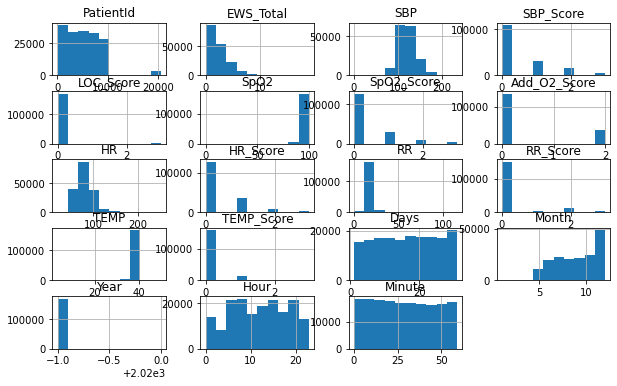

In [16]:
df.hist(figsize=(10,6))

In [17]:
df.corr()

,PatientId,EWS_Total,SBP,SBP_Score,LOC_Score,SpO2,SpO2_Score,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score,Days,Month,Year,Hour,Minute
PatientId,1.000000,-0.030384,0.008993,0.000958,0.011073,0.027193,-0.029066,-0.016462,-0.057268,-0.049046,-0.029104,0.004818,0.009706,-0.001624,0.078450,0.693001,0.189172,-0.005903,-0.004596
EWS_Total,-0.030384,1.000000,-0.351369,0.452765,0.135683,-0.274494,0.495180,0.621261,0.426665,0.464483,0.394173,0.496666,0.120622,0.121473,0.009451,0.007280,-0.003199,0.004363,-0.002188
SBP,0.008993,-0.351369,1.000000,-0.732087,-0.009029,0.007332,-0.001378,-0.048282,-0.059962,-0.038119,-0.006608,0.000652,-0.017862,0.018561,-0.012740,-0.004226,-0.002598,-0.004473,0.002489
SBP_Score,0.000958,0.452765,-0.732087,1.000000,0.019183,0.002609,-0.010254,0.025387,0.029459,0.024532,0.000270,-0.001527,-0.014835,-0.003837,0.013593,0.003113,0.004543,-0.011966,0.001252
LOC_Score,0.011073,0.135683,-0.009029,0.019183,1.000000,-0.005953,0.010546,0.020258,0.018421,0.014235,0.028876,0.033740,0.025984,0.007321,0.011769,0.004560,-0.001504,-0.003185,-0.005477
SpO2,0.027193,-0.274494,0.007332,0.002609,-0.005953,1.000000,-0.447606,-0.160846,-0.129016,-0.084010,-0.108589,-0.049783,-0.067494,0.021476,-0.013668,-0.003670,0.008367,0.002517,-0.006347
SpO2_Score,-0.029066,0.495180,-0.001378,-0.010254,0.010546,-0.447606,1.000000,0.220045,0.105842,0.064512,0.102997,0.055378,0.083942,-0.015110,0.002915,-0.007948,-0.008088,-0.005182,0.001507
Add_O2_Score,-0.016462,0.621261,-0.048282,0.025387,0.020258,-0.160846,0.220045,1.000000,0.226129,0.151552,0.207060,0.150688,0.133511,-0.038121,0.006323,0.007794,-0.003193,0.007475,-0.008177
HR,-0.057268,0.426665,-0.059962,0.029459,0.018421,-0.129016,0.105842,0.226129,1.000000,0.733117,0.277900,0.145996,0.243363,-0.071367,0.001782,0.026959,-0.009296,0.055206,-0.005714
HR_Score,-0.049046,0.464483,-0.038119,0.024532,0.014235,-0.084010,0.064512,0.151552,0.733117,1.000000,0.192946,0.133098,0.154444,-0.018245,-0.001127,0.006507,-0.002093,0.029799,0.000676


In [18]:
df.isnull().sum()

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
Days                   0
Month                  0
Year                   0
Hour                   0
Minute                 0
dtype: int64

In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df.isnull().sum()

PatientId          0
ObservationDate    0
EwsProcedure       0
EWS_Total          0
SBP                0
SBP_Score          0
LOC                0
LOC_Score          0
SpO2               0
SpO2_Score         0
Add_O2             0
Add_O2_Score       0
HR                 0
HR_Score           0
RR                 0
RR_Score           0
TEMP               0
TEMP_Score         0
Days               0
Month              0
Year               0
Hour               0
Minute             0
dtype: int64

In [21]:
df.columns

Index(['PatientId', 'ObservationDate', 'EwsProcedure', 'EWS_Total', 'SBP',
       'SBP_Score', 'LOC', 'LOC_Score', 'SpO2', 'SpO2_Score', 'Add_O2',
       'Add_O2_Score', 'HR', 'HR_Score', 'RR', 'RR_Score', 'TEMP',
       'TEMP_Score', 'Days', 'Month', 'Year', 'Hour', 'Minute'],
      dtype='object')

In [28]:
x = df[['SBP',
       'LOC','SpO2',
       'HR','RR', 'TEMP']].values

In [29]:
y = df[['EWS_Total']].values

In [30]:
df['EWS_Total'].unique()

array([ 0,  1,  2,  3,  6,  7,  5,  4,  9, 10,  8, 12, 19, 13, 11, 14, 15],
      dtype=int64)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
ct = ColumnTransformer(transformers=[('encoder',
                                     OneHotEncoder(),
                                     [1])],
                                     remainder='passthrough')

In [33]:
x = np.array(ct.fit_transform(x))

In [34]:
x[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 143.0, 96.0, 80, 18, 36.6], dtype=object)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
x_train[:,5:] = sc.fit_transform(x_train[:,5:])
x_test[:,5:] = sc.fit_transform(x_test[:,5:])

In [40]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# prepare models

In [41]:
#Using seed to maintain reproducability and consistent results
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))

In [42]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
import warnings
warnings.filterwarnings("ignore")
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train,
    cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.401404 (0.003383)
LDA: 0.394827 (0.002531)
KNN: 0.618682 (0.003671)
CART: 0.638325 (0.003396)
NB: 0.405984 (0.003751)
RFC: 0.728728 (0.004459)


In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)

In [50]:
lr.fit(x_poly, y_train)

LinearRegression()

In [51]:
y_predP = lr.predict(poly_reg.transform(x_test))

In [52]:
print(np.concatenate((y_predP.reshape(len(y_predP),1), y_test.reshape(len(y_test),1)),1))

[[0.89118958 1.        ]
 [6.02871704 8.        ]
 [0.82616615 1.        ]
 ...
 [1.47001839 0.        ]
 [1.00904274 0.        ]
 [1.82507133 4.        ]]


In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predP)

-4939692763541808.0

### Linear SVC

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVC

In [55]:
linear_svm = LinearSVC().fit(x_train,y_train)

In [ ]:
y_predSV = linear_svm.predict(x_test)

In [ ]:
np.concatenate((np.ceil(y_predSV.reshape(len(y_predSV),1)),
               y_test.reshape(len(y_test), 1)),1)

In [ ]:
r2_score(y_test, y_predSV)

In [ ]:
plt.plot(x_test,y_test,color='blue')
plt.plot(x_test,y_predSV,color='red')

In [ ]:
plt.plot(x_test,y_test,color='blue')

In [ ]:
plt.plot(x_test,y_predP,color='red')

### RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()

In [ ]:
RFC.fit(x_train,y_train)

In [ ]:
y_predRF = RFC.predict(x_test)

In [ ]:
np.concatenate((np.ceil(y_predRF.reshape(len(y_predRF),1)),
               y_test.reshape(len(y_test), 1)),1)

In [ ]:
plt.plot(x_test,y_test,color='blue')
plt.plot(x_test,y_predRF,color='red')

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
np.concatenate((np.ceil(y_pred.reshape(len(y_pred),1)),
               y_test.reshape(len(y_test), 1)),1)

In [ ]:
plt.plot(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
plt.plot_date(df.DatesInNumber,df.EWS_Total)

In [ ]:
import seaborn as sns

# Some boilerplate to initialise things
sns.set()
plt.figure()

# This is where the actual plot gets made
ax = sns.barplot(data=df, x='EWS_Total', y="SBP", hue="EWS_Total", saturation=0.6)

# Customise some display properties
ax.set_title('Ews')
ax.grid(color='#cccccc')
ax.set_ylabel('SBP')
ax.set_xlabel(None)
ax.set_xticklabels(df['ObservationDate'].unique().astype(str), rotation='vertical')
# Ask Matplotlib to show it
plt.show()

### How to convert dates to number

In [57]:
import matplotlib 
data = matplotlib.dates.date2num(df['ObservationDate'])

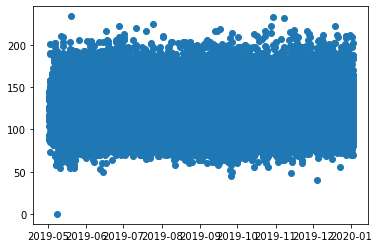

In [58]:
plt.plot_date(data, df.SBP)

In [ ]:
import matplotlib.dates as mdates

In [ ]:
df['DatesInNumber'] = mdates.date2num(df.ObservationDate)

In [ ]:
df.head()

### DecisionTreeRegression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
regressor.fit(x_train,y_train)

In [ ]:
y_predD = regressor.predict(x_test)

In [ ]:
np.concatenate((np.ceil(y_predD.reshape(len(y_pred),1)),
               y_test.reshape(len(y_test), 1)),1)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predD)

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
regr.fit(x_train,y_train.ravel())

In [ ]:
y_predR = regr.predict(x_test)

In [ ]:
np.concatenate((np.ceil(y_predR.reshape(len(y_pred),1)),
               y_test.reshape(len(y_test), 1)),1)

In [ ]:
plt.plot(x_test,y_test,color='blue')
plt.plot(x_test,y_predR,color='red')

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predR)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
model = nb.fit(x_train,y_train.ravel())

In [ ]:
y_predN = model.predict(x_test)

In [ ]:
np.concatenate((np.ceil(y_predN.reshape(len(y_pred),1)),
               y_test.reshape(len(y_test), 1)),1)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predN)

In [ ]:
plt.plot(x_test,y_test,color='blue')
plt.plot(x_test,y_predN,color='red')

### Stochastic Gradient Descent Regression

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sg = SGDRegressor(loss='huber')
sg1 = SGDRegressor(loss="squared_loss")
sg2 = SGDRegressor(loss="epsilon_insensitive")

In [ ]:
md = sg.fit(x_train,y_train)
md1 = sg1.fit(x_train,y_train)
md2 = sg2.fit(x_train,y_train)

In [ ]:
y_predSGDR = md.predict(x_test)
y_predSGDR1 = md1.predict(x_test)
y_predSGDR2 = md2.predict(x_test)

In [ ]:
np.concatenate((np.ceil(y_predSGDR.reshape(len(y_predSGDR),1)),
               y_test.reshape(len(y_test), 1)),1)

In [ ]:
plt.plot(x_test,y_test,color='blue')
plt.plot(x_test,y_predSGDR,color='red')

In [ ]:
plt.plot(x_test,y_test,color='blue')
plt.plot(x_test,y_predSGDR1,color='red')

In [ ]:
plt.plot(x_test,y_test,color='blue')
plt.plot(x_test,y_predSGDR2,color='red')

In [ ]:
r2_score(y_test, y_predSGDR)

In [ ]:
r2_score(y_test, y_predSGDR1)

In [ ]:
r2_score(y_test, y_predSGDR2)

### FeatureEngineering

In [ ]:
#Broke down the logic into a scoring function and a For loop
def scorer(feature):
# Make a copy of the DataFrame, using the 'drop' function to drop the
#given feature relevant_data = data.drop([feature], axis=1)
# Split the data into training and testing sets using the given
#feature as the target X_train, X_test, y_train, y_test =
#train_test_split(relevant_data, data[feature], test_size=0.25,
#random_state=45)
# Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=45).fit(x_train, y_train)
# Report the score of the prediction using the testing set
    score = regressor.score(x_test, y_test)
    print("The R2 score for feature {:16} is {:+.5f}".format(feature, score))

In [ ]:
for feature in df.columns.values:
    scorer(feature)